In [2]:
import cv2
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from itertools import zip_longest
from pprint import pprint
from skgstat import *
from PIL import Image
from scipy.interpolate import make_interp_spline, BSpline

True

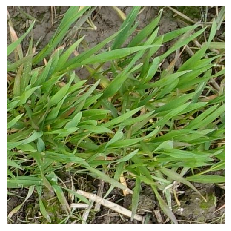

In [3]:
path='/home/capte-gpu-2/Documents/Projet/Dataset/immm/images/'
indice='417'
forme='.png'
img = cv2.imread(path+indice+forme)[...,::-1] 
shape = img.shape
plt.axis('off')
plt.imshow(img)

path='/home/capte-gpu-2/Documents/Projet/Dataset/immm/masks/'
label = cv2.imread(path+indice+forme, 0) 
shape = label.shape
black_background = np.zeros(shape=shape, dtype=np.uint8)
shape = black_background.shape 
img2 = img.copy()
cv2.bitwise_not(img, img2) 
result = cv2.bitwise_not(img2,black_background,mask=label)[...,::-1] 
cv2.imwrite("masked.png",result)

maxlag=0.25
n_lags=100

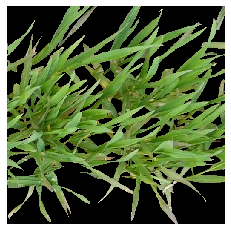

In [4]:
path='/home/capte-gpu-2/environments/scikit-gstat/'
indice='masked'
forme='.png'
im =cv2.imread(path+indice+forme)[...,::-1]
plt.axis('off')
plt.imshow(im)

h=im.shape[0]
w=im.shape[1]
decoup=[128]

In [5]:
def table(grille,L,l):

    for d in decoup:
        y_ = 0
        M = h//d
        N = w//d
        
        m=[]
        v=[]
        i=[]
        j=[]
        
        for y in range(0,h,M):
            for x in range(0,w,N):
                y_ = y + M
                x_ = x + N
                bloc = im[y:y+M,x:x+N]
        
                i.append(x_)
                j.append(y_)
    
                mean=np.mean(bloc)
        
                m.append(mean)
        
                var=np.var(bloc)
                v.append(var)
    
        m = list(np.around(np.array(m)))
        v = list(np.around(np.array(v)))
    
        c = [i,j,m,v]
        exp = zip_longest(*c, fillvalue = '')

        
        with open('/home/capte-gpu-2/environments/Variance/table_'+indice+'_{0}.csv'.format(d), 'w', encoding="ISO-8859-1", newline='') as doc:
              wr = csv.writer(doc)
              wr.writerow(('x','y','m','v'))
              wr.writerows(exp)
        doc.close()
    
    
table(decoup,h,w)

In [27]:
from skgstat import Variogram, OrdinaryKriging
data = pd.read_csv('/home/capte-gpu-2/environments/Variance/table_'+indice+'_'+grille+'.csv',sep=",")
print("%d rows and %d columns" % data.shape)
data.head()

16384 rows and 4 columns


,x,y,m,v
0,4,4,0.0,0.0
1,8,4,0.0,0.0
2,12,4,0.0,0.0
3,16,4,0.0,0.0
4,20,4,0.0,0.0


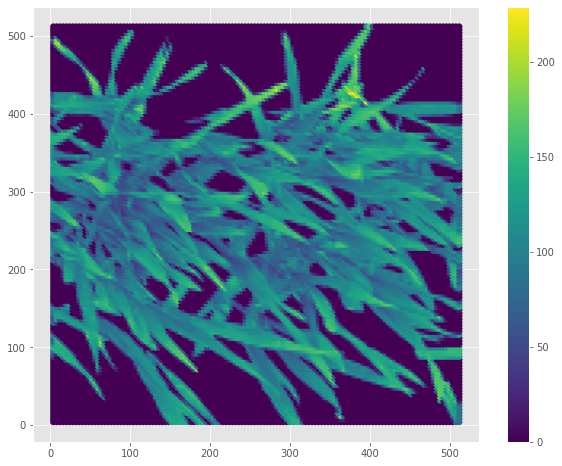

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
art = ax.scatter(data.x,data.y, c=data.m)
plt.colorbar(art);

exponential Variogram
---------------------
Estimator:         cressie
Effective Range:   26.94
Sill:              1222.37
Nugget:            0.00
        


/home/capte-gpu-2/environments/scikit-gstat/skgstat/Variogram.py:1634: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


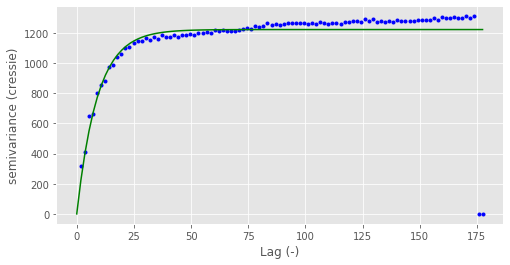

In [6]:
grille='128'

data = pd.read_csv('/home/capte-gpu-2/environments/Variance/table_'+indice+'_'+grille+'.csv',sep=",")
data = data[data.m != 0]
V = Variogram(list(zip(data.x, data.y)), data.m,normalize=False,maxlag=maxlag,model='exponential',n_lags=n_lags,estimator='cressie')
V.plot(hist=False,grid=False)
print(V)

In [ ]:
                     ### ALGORITHM FOR A WHOLE DATASET AND TARGET VALUE OF EFFECTIVE RANGE ###

In [30]:
import numpy as np
from scipy.ndimage import zoom


def clipped_zoom(img, zoom_factor, **kwargs):

    h, w = img.shape[:2]
    zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)

    # Zooming out
    if zoom_factor < 1:

        zh = int(np.round(h * zoom_factor))
        zw = int(np.round(w * zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2

        out = np.zeros_like(img)
        out[top:top+zh, left:left+zw] = zoom(img, zoom_tuple, **kwargs)
        
      
    # Zooming in
    elif zoom_factor > 1:

        zh = int(np.round(h / zoom_factor))
        zw = int(np.round(w / zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2

        out = zoom(img[top:top+zh, left:left+zw], zoom_tuple, **kwargs)

        trim_top = ((out.shape[0] - h) // 2)
        trim_left = ((out.shape[1] - w) // 2)
        out = out[trim_top:trim_top+h, trim_left:trim_left+w]

    else:
        out = img
    return (out,top,top+zh,left,left+zw)

exponential Variogram
---------------------
Estimator:         cressie
Effective Range:   26.52
Sill:              1543.67
Nugget:            0.00
        
26.522375102336415
exponential Variogram
---------------------
Estimator:         cressie
Effective Range:   13.85
Sill:              1518.59
Nugget:            0.00
        
13.846235400674118
132
380
132
380
 ^ Size of black borders/cropped image, respectively x and y
[13.846235400674118]
[13.846235400674118]


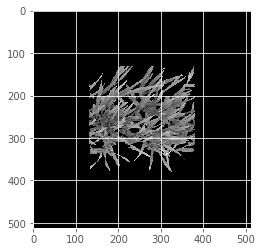

In [40]:
indice=['417']

maxlag=0.5
zooo=1
rz=[]

for lala in indice:
    grille='64'
    decoup=[64]
    path='/home/capte-gpu-2/Documents/Projet/Dataset/immm/'
    pic='images/'
    forme='.png'
    img = cv2.imread(path+pic+lala+forme)[...,::-1] 
    
    pic='masks/'
    label = cv2.imread(path+pic+lala+forme, 0) 

    black_background = np.zeros(shape=shape, dtype=np.uint8)
    shape = black_background.shape 

    img2 = img.copy()
    cv2.bitwise_not(img, img2) 
    result = cv2.bitwise_not(img2,black_background,mask=label)[...,::-1] 
    cv2.imwrite(lala+'.png',result)

    path='/home/capte-gpu-2/environments/scikit-gstat/'
    im =cv2.imread(path+lala+forme)[...,::-1]
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

    ##################
    ##################
    
    h=im.shape[0]
    w=im.shape[1]
    
    for d in decoup:
        y_ = 0
        M = h//d
        N = w//d
        
        m=[]
        v=[]
        i=[]
        j=[]
        
        for y in range(0,h,M):
            for x in range(0,w,N):
                y_ = y + M
                x_ = x + N
                bloc = im[y:y+M,x:x+N]
        
                i.append(x_)
                j.append(y_)
    
                mean=np.mean(bloc)
        
                m.append(mean)
        
                var=np.var(bloc)
                v.append(var)
    
        m = list(np.around(np.array(m)))
        v = list(np.around(np.array(v)))
    
        c = [i,j,m,v]
        exp = zip_longest(*c, fillvalue = '')

        
        with open('/home/capte-gpu-2/environments/Variance/table_'+lala+'_{0}.csv'.format(d), 'w', encoding="ISO-8859-1", newline='') as doc:
                wr = csv.writer(doc)
                wr.writerow(('x','y','m','v'))
                wr.writerows(exp)
        doc.close()

    data = pd.read_csv('/home/capte-gpu-2/environments/Variance/table_'+lala+'_'+grille+'.csv',sep=",")
    data = data[data.m != 0]
    V = Variogram(list(zip(data.x, data.y)), data.m,normalize=False,maxlag=maxlag,model='exponential',n_lags=100,estimator='cressie')
    pz=V.describe()['effective_range']
    print(V)
    print(pz)
    
    
    zooo = 0.5 # Begin at 0.5 factor reduced image
    
    ##################
    ##################
    
    while pz < 10 or pz > 14 : # Range target effective range
        
        decoup = [128]
        grille = '128'
        
        zooo = zooo - 0.015 # We reduce image of 0.015 factor
        
        path='/home/capte-gpu-2/environments/scikit-gstat/'
        im =cv2.imread(path+lala+forme)[...,::-1]
        im = clipped_zoom(im, zooo)
        
        im = im[0]
        
        im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        plt.imshow(im,cmap='gray')
        
        h=im.shape[0]
        w=im.shape[1]
    
        for d in decoup:
            y_ = 0
            M = h//d
            N = w//d

            m=[]
            v=[]
            i=[]
            j=[]

            for y in range(0,h,M):
                for x in range(0,w,N):
                    y_ = y + M
                    x_ = x + N
                    bloc = im[y:y+M,x:x+N]

                    i.append(x_)
                    j.append(y_)

                    mean=np.mean(bloc)

                    m.append(mean)

                    var=np.var(bloc)
                    v.append(var)

            m = list(np.around(np.array(m)))
            v = list(np.around(np.array(v)))

            c = [i,j,m,v]
            exp = zip_longest(*c, fillvalue = '')


            with open('/home/capte-gpu-2/environments/Variance/table_'+lala+'_{0}.csv'.format(d), 'w', encoding="ISO-8859-1", newline='') as doc:
                    wr = csv.writer(doc)
                    wr.writerow(('x','y','m','v'))
                    wr.writerows(exp)
            doc.close()

        data = pd.read_csv('/home/capte-gpu-2/environments/Variance/table_'+lala+'_'+grille+'.csv',sep=",")
        data = data[data.m != 0]
        V = Variogram(list(zip(data.x, data.y)), data.m,normalize=False,maxlag=maxlag,model='exponential',n_lags=100,estimator='cressie')
        pz=V.describe()['effective_range']
        print(V)
        print(pz)

        ##################
        ##################
        
        path='/home/capte-gpu-2/Documents/Projet/Dataset/immm/'
        pic='images/'
        img = cv2.imread(path+pic+lala+forme)[...,::-1] 
        
        img = clipped_zoom(img, zooo)
    
        qa=img[1]
        qay=img[2]
        diim=qay-qa
        
        img=img[0]
        
        img = cv2.imwrite(lala+'__'+'.png',img)
        img = cv2.imread(lala+'__'+'.png',img)[...,::-1]
        img = cv2.imwrite(lala+'__'+'.png',img)
        
        ##################
        ################## CROPPED AND UPSAMPLED IMAGES & MASKS ##################
        
        pic='images/'
        img = cv2.imread(path+pic+lala+forme)[...,::-1] 
        print(qa)
        print(qay)
        imggg  = cv2.resize(img , (diim,diim),interpolation=cv2.INTER_CUBIC)
        imggg  = cv2.resize(imggg , (512,512),interpolation=cv2.INTER_CUBIC)
        imggg = Image.fromarray(imggg)
        imggg.save('/home/capte-gpu-2/environments/Variance/'+lala+'__'+'.png')
        
        ##################
        ##################
        
        pic='masks/'
        label = cv2.imread(path+pic+lala+forme,0)
        
        label = clipped_zoom(label, zooo)
        
        ws= label[1]
        wsx= label[2]

        label=label[0]
        
        labell= label[ws:wsx,ws:wsx]
        print(ws)
        print(wsx)
        labell  = cv2.resize(labell , (512,512),interpolation=cv2.INTER_CUBIC)
        labell = Image.fromarray(labell)
        labell.save('/home/capte-gpu-2/environments/Variance/'+lala+'___'+'.png')
        
        label=cv2.imwrite(lala+'___'+'.png',label)
        #######################
 
    rz.append(pz)
    print(' ^ Size of black borders/cropped image, respectively x and y')
    print(rz)

print(rz)